In [1]:
import tensorflow as tf
import os 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import random 
import pathlib 

In [2]:
# peaking into the datset
for dirpath, dirnames, filenames in os.walk("Lung and Colon Cancer"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 5 directories and 0 images in 'Lung and Colon Cancer'.
there are 0 directories and 5000 images in 'Lung and Colon Cancer\colon_aca'.
there are 0 directories and 5000 images in 'Lung and Colon Cancer\colon_bnt'.
there are 0 directories and 5000 images in 'Lung and Colon Cancer\lung_aca'.
there are 0 directories and 5000 images in 'Lung and Colon Cancer\lung_bnt'.
there are 0 directories and 5000 images in 'Lung and Colon Cancer\lung_scc'.


In [3]:
import shutil

# set the percentage of images to use for testing
test_pct = 0.3

# set the root directory for the image data
data_root = 'Lung and Colon Cancer'

# set the directories for the train and test data
train_dir = 'train'
test_dir = 'test'

# create the train and test directories
if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(test_dir):
    os.makedirs(test_dir)
    
# iterate over each class directory
for class_dir in os.listdir(data_root):
    class_path = os.path.join(data_root, class_dir)

    # skip any non-directory files
    if not os.path.isdir(class_path):
        continue

    print(f"Processing images in directory: {class_path}")

    # create the subdirectories for this class in the train and test directories
    train_class_dir = os.path.join(train_dir, class_dir)
    test_class_dir = os.path.join(test_dir, class_dir)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # get the list of image files in the class directory
    image_files = [os.path.join(class_path, filename) for filename in os.listdir(class_path)
                   if os.path.isfile(os.path.join(class_path, filename))]

    # shuffle the list of image files
    random.shuffle(image_files)

    # split the image files into train and test sets based on the split percentage
    split_idx = int(len(image_files) * (1 - test_pct))
    train_images = image_files[:split_idx]
    test_images = image_files[split_idx:]

    # copy the train images to the train directory
    for image_path in train_images:
        image_name = os.path.basename(image_path)
        shutil.copy2(image_path, os.path.join(train_class_dir, image_name))

    # copy the test images to the test directory
    for image_path in test_images:
        image_name = os.path.basename(image_path)
        shutil.copy2(image_path, os.path.join(test_class_dir, image_name))

print("Done!")

Processing images in directory: Lung and Colon Cancer\colon_aca
Processing images in directory: Lung and Colon Cancer\colon_bnt
Processing images in directory: Lung and Colon Cancer\lung_aca
Processing images in directory: Lung and Colon Cancer\lung_bnt
Processing images in directory: Lung and Colon Cancer\lung_scc
Done!


['colon_aca_1441.jpg']
image shape: (512, 512, 3)


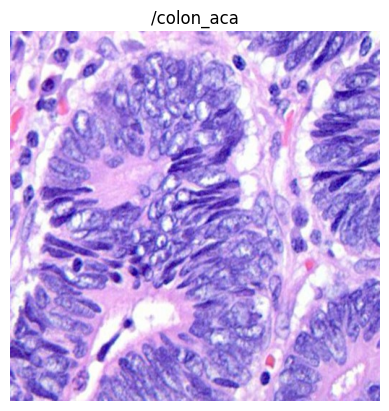

In [7]:
 
def random_image_viewer(target_dir,target_class):
    #setup target directory
    target_folder=target_dir+target_class

    #GET RANDOM IMAGE PATH 
    random_image=random.sample(os.listdir(target_folder), 1)
    print(random_image)

    #read the image and plot it using matplotlib 
    img=mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape: {img.shape}")
    
    return img


img=random_image_viewer(target_dir="train/",target_class="/colon_aca")